In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from imutils import paths
from keras.preprocessing.image import ImageDataGenerator

In [16]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Importing Dataset

In [3]:
ds = r"C:\Users\Dikshant Gupta\Desktop\GAIP\Project\Merged Dataset"

In [4]:
Test_path=os.path.sep.join([ds, "Test"])
Train_path=os.path.sep.join([ds, "Train"])
Val_path=os.path.sep.join([ds, "Val"])

In [5]:
totalTest = len(list(paths.list_images(Test_path)))
totalTest

61

In [6]:
totalTrain = len(list(paths.list_images(Train_path)))
totalTrain

2992

In [7]:
totalVal = len(list(paths.list_images(Val_path)))
totalVal

748

# Data Augmentation

In [8]:
ds_aug = ImageDataGenerator(horizontal_flip=True,
                            rescale=1 / 255.0,
                            rotation_range=20,
                            zoom_range=0.25,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            fill_mode="nearest")
ds_aug2 = ImageDataGenerator(rescale=1 / 255.0)

In [9]:
training_data = ds_aug.flow_from_directory(Train_path,
                                            target_size=(64,64),
                                            batch_size=10,
                                            class_mode='binary',
                                            color_mode="rgb",
                                            shuffle=False)

val_data = ds_aug2.flow_from_directory(Val_path,
                                        target_size=(64,64),
                                        batch_size=10,
                                        class_mode='binary',
                                        color_mode="rgb",
                                        shuffle=False)

Found 2992 images belonging to 2 classes.
Found 748 images belonging to 2 classes.


In [10]:
training_data.samples

2992

# Model Training

In [13]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Reshape, Activation

In [33]:
# Building the model
model = Sequential()

# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = (64,64,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 29, 29, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                  

In [35]:
model.compile(loss="binary_crossentropy",
           optimizer='adam',
           metrics=["accuracy"])

In [48]:
history = model.fit(training_data,
                    batch_size=32,
                    epochs=70,
                    validation_data=val_data,
                    shuffle=True)

Epoch 1/70
300/300 [==============================] - 12s 41ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0422 - val_accuracy: 0.9866
Epoch 2/70
300/300 [==============================] - 12s 40ms/step - loss: 0.0350 - accuracy: 0.9860 - val_loss: 0.0462 - val_accuracy: 0.9826
Epoch 3/70
300/300 [==============================] - 13s 42ms/step - loss: 0.0398 - accuracy: 0.9873 - val_loss: 0.0399 - val_accuracy: 0.9906
Epoch 4/70
300/300 [==============================] - 12s 41ms/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.0365 - val_accuracy: 0.9853
Epoch 5/70
300/300 [==============================] - 13s 42ms/step - loss: 0.0306 - accuracy: 0.9870 - val_loss: 0.0405 - val_accuracy: 0.9893
Epoch 6/70
300/300 [==============================] - 12s 41ms/step - loss: 0.0284 - accuracy: 0.9893 - val_loss: 0.0526 - val_accuracy: 0.9866
Epoch 7/70
300/300 [==============================] - 13s 42ms/step - loss: 0.0351 - accuracy: 0.9900 - val_loss: 0.0691 - val_accuracy:

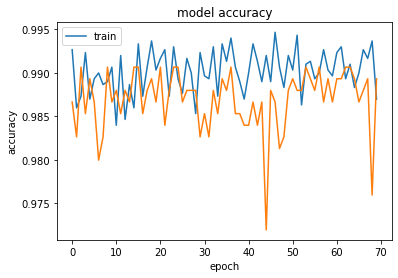

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train',], loc='upper left')
plt.show()

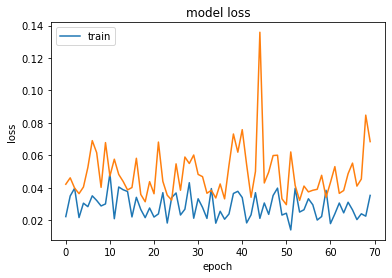

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [52]:
# model.save('CNN_3.h5')

In [56]:
import numpy as np
from keras.preprocessing import image

test_image = image.load_img(r'C:\Users\Dikshant Gupta\Desktop\GAIP\Project\Merged Dataset\Test\mehul.jpeg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
print(result)
if result[0][0] >= 0.5:
    p = 'normal'
else:
    p = 'cataract'
print(p)

[[1.]]
normal


SyntaxError: invalid syntax (2345228751.py, line 1)